In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

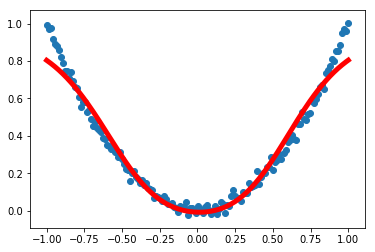

In [3]:
#create 150 random points from -1 to 1
x_data = np.linspace(-1,1,150)[:,np.newaxis]
#create bias
noise = np.random.normal(0,0.02,x_data.shape)
#create a nolinear model
y_data = np.power(x_data,2)+noise
#define two placehoders
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#create a neural network containing only one input layer and output layer 
Weights_L1 = tf.Variable(tf.random_normal([1,20]))
biases_L1 = tf.Variable(tf.zeros([1,20]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
#tanh is activation function
L1 = tf.nn.tanh(Wx_plus_b_L1)

Weights_L2 = tf.Variable(tf.random_normal([20,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2)+biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)


#define loss function
loss = tf.reduce_mean(tf.square(y-prediction))
#define an optimizer baesd on GradientDescent to minimize loss function
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
#initialize all global variables
init = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init)
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    #use matplotlib to show the prediction value and theorectical value in the same figure
    plt.figure()
    plt.scatter(x_data,y_data) #theorectical value
    plt.plot(x_data,prediction_value,'r-',lw=5) #predictional value
    plt.show()